## 데이터 출저
https://www.kaggle.com/datasets/sujaykapadnis/github-metrics/

2020 ~ 2023년도 GitHub -- Languege

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
# 한글 폰트 설정 (Windows)
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# 데이터 불러오기
languege = pd.read_csv('data/languages.csv', encoding='CP949')
languege

,num_pushers,language,language_type,iso2_code,year,quarter
0,258180,CSS,markup,EU,2020,1
1,68794,PHP,programming,EU,2020,1
2,845,Pawn,programming,EU,2020,1
3,410,Ada,programming,EU,2020,1
4,157,BitBake,programming,EU,2020,1
...,...,...,...,...,...,...
81563,1251,Procfile,programming,PK,2023,1
81564,117,Sass,markup,EG,2022,4
81565,631,PLpgSQL,programming,PL,2023,1
81566,266,R,programming,CL,2023,1


In [4]:
languege

,num_pushers,language,language_type,iso2_code,year,quarter
0,258180,CSS,markup,EU,2020,1
1,68794,PHP,programming,EU,2020,1
2,845,Pawn,programming,EU,2020,1
3,410,Ada,programming,EU,2020,1
4,157,BitBake,programming,EU,2020,1
...,...,...,...,...,...,...
81563,1251,Procfile,programming,PK,2023,1
81564,117,Sass,markup,EG,2022,4
81565,631,PLpgSQL,programming,PL,2023,1
81566,266,R,programming,CL,2023,1


In [5]:
# 사용 언어 총합
grouped_languege = languege.groupby('language')
grouped_languege_result = grouped_languege['num_pushers'].agg('sum').reset_index()
grouped_languege_result

,language,num_pushers
0,1C Enterprise,7200
1,ABAP,8289
2,AGS Script,9790
3,AIDL,34272
4,AL,422
...,...,...
373,mcfunction,3284
374,nesC,2943
375,q,11088
376,sed,237805


In [6]:
# 가장 많이 사용한 언어 Top 10 내림차순 정렬 
grouped_languege_result = grouped_languege_result.sort_values('num_pushers', ascending=False)
top_10 = grouped_languege_result.head(10)
top_10

,language,num_pushers
132,HTML,33961824
157,JavaScript,28794844
50,CSS,26501872
261,Python,16831959
303,Shell,15443535
156,Java,10093065
87,Dockerfile,6964473
335,TypeScript,6854340
45,C++,6228900
288,SCSS,6188492


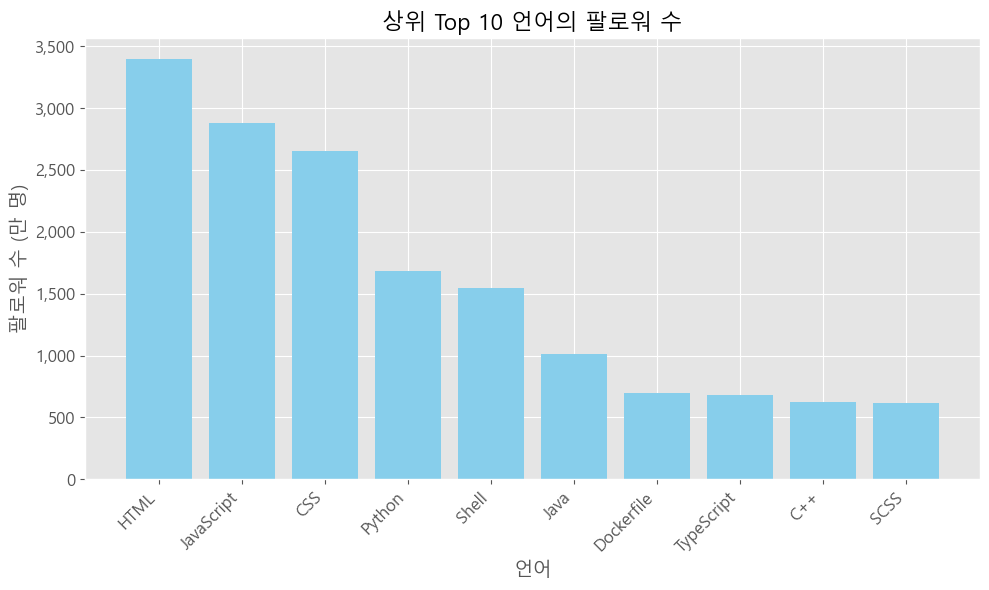

In [26]:
# 그래프 스타일 설정
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))  # 그림 크기 설정
bars = plt.bar(top_10['language'], top_10['num_pushers'] / 10000, color='skyblue')
plt.xlabel('언어', fontsize=14)  # x축 레이블 크기 조정
plt.ylabel('팔로워 수 (만 명)', fontsize=14)  # y축 레이블 크기 조정
plt.title('상위 Top 10 언어의 팔로워 수', fontsize=16)  # 제목 크기 조정

# 언어 이름을 x축에 표시
plt.xticks(rotation=45, ha='right', fontsize=12)  # x축 레이블 회전 및 크기 조정

# y축 레이블에 '만 명' 추가
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()  # 그래프 요소들이 잘 보이도록 조정

plt.show()  # 그래프 표시